# Программирование на языке Python
## Семинар 2. Введение в pandas

#### Pandas

**Data source:** https://www.kaggle.com/datasets/spscientist/students-performance-in-exams.

**Columns:**
- `gender` (binary variable);
- `race/ethnicity` (categorical variable);
- `parental level of education` (categorical variable, student's parents' level of education);
- `lunch` (categorical variable, quality of student's lunch);
- `test preparation course` (categorical variable, whether student managed to complete preparation course for the test);
- `math score` (numeric variable, score for Math test);
- `reading score` (numeric variable, score for Reading part);
- `writing score` (numeric variable, score for Writing part).

In [4]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('StudentsPerformance.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
data.sample(5) # вывод случайных строк

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
53,male,group D,high school,standard,none,88,78,75
986,female,group C,associate's degree,standard,none,40,59,51
672,female,group C,some college,standard,none,69,78,76
52,male,group C,some college,standard,none,53,44,42
289,male,group E,some high school,standard,completed,77,76,77


#### Переименуйте переменные таким образом, чтобы их названия состояли только из букв и нижнего подчеркивания

In [ ]:
data.rename(columns={
    
}) # можно подавать словарь, переименовывающий каждый столбец по отдельноести


In [14]:
data.rename(columns=lambda name: name.replace(' ', '_').replace('/', '_'), inplace=True) 

In [15]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
?pd.DataFrame.rename

Signature:
pd.DataFrame.rename(
    self,
    mapper: 'Renamer | None' = None,
    *,
    index: 'Renamer | None' = None,
    columns: 'Renamer | None' = None,
    axis: 'Axis | None' = None,
    copy: 'bool | None' = None,
    inplace: 'bool' = False,
    level: 'Level' = None,
    errors: 'IgnoreRaise' = 'ignore',
) -> 'DataFrame | None'
Docstring:
Rename columns or index labels.

Function / dict values must be unique (1-to-1). Labels not contained in
a dict / Series will be left as-is. Extra labels listed don't throw an
error.

See the :ref:`user guide <basics.rename>` for more.

Parameters
----------
mapper : dict-like or function
    Dict-like or function transformations to apply to
    that axis' values. Use either ``mapper`` and ``axis`` to
    specify the axis to target with ``mapper``, or ``index`` and
    ``columns``.
index : dict-like or function
    Alternative to specifying axis (``mapper, axis=0``
    is equivalent to ``index=mapper``).
columns : dict-like or function
   

#### Изучите данные и посчитайте описательные статистики

In [16]:
data['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [17]:
data['gender'].value_counts(normalize=True)

gender
female    0.518
male      0.482
Name: proportion, dtype: float64

In [18]:
data['race_ethnicity'].value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [19]:
data['parental_level_of_education'].value_counts()
# сделать переменную, в которой будут группы с высшим образование и без высшего образования

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [20]:
data['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [22]:
data['test_preparation_course'].value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

Теперь работаем с числовыми переменными

In [29]:
numeric_vars = ['math_score', 'reading_score', 'writing_score']
data[numeric_vars].describe().round()

,math_score,reading_score,writing_score
count,1000.0,1000.0,1000.0
mean,66.0,69.0,68.0
std,15.0,15.0,15.0
min,0.0,17.0,10.0
25%,57.0,59.0,58.0
50%,66.0,70.0,69.0
75%,77.0,79.0,79.0
max,100.0,100.0,100.0


#### Преобразуйте те переменные, которые сочтете нужным преобразовать

In [30]:
data['parental_level_of_education'].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [34]:
higher_cotegories = [
    "associate's degree", "bachelor's degree", "master's degree", "some college"
    ]
# True высшее, False - иначе 
data['parental_higher_education'] = data['parental_level_of_education'].isin(higher_cotegories)

In [37]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,parental_higher_education
0,female,group B,bachelor's degree,standard,none,72,72,74,True
1,female,group C,some college,standard,completed,69,90,88,True
2,female,group B,master's degree,standard,none,90,95,93,True
3,male,group A,associate's degree,free/reduced,none,47,57,44,True
4,male,group C,some college,standard,none,76,78,75,True


In [32]:
data['parental_level_of_education'].isin

<bound method Series.isin of 0       bachelor's degree
1            some college
2         master's degree
3      associate's degree
4            some college
              ...        
995       master's degree
996           high school
997           high school
998          some college
999          some college
Name: parental_level_of_education, Length: 1000, dtype: object>

In [33]:
[1, 2] in [1,2,3,44] # так не работает
pd.Series([1, 2]).isin([1,2,3,44])

0    True
1    True
dtype: bool

#### Какие гипотезы у вас появились? Попробуйте их проверить

Необходимо выдвинуть хотя бы одну гипотезу о взаимосвязи двух переменных и одну гипотезу о разнице значений в двух группах.

In [38]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,parental_higher_education
0,female,group B,bachelor's degree,standard,none,72,72,74,True
1,female,group C,some college,standard,completed,69,90,88,True
2,female,group B,master's degree,standard,none,90,95,93,True
3,male,group A,associate's degree,free/reduced,none,47,57,44,True
4,male,group C,some college,standard,none,76,78,75,True


**Гипотеза 0.** Те, кто готовился, сдали лучше


**Гипотеза 1.** Те, чьи родители имеют высшее образования, показывают более высокий бал

In [ ]:
# Python -> pandas
# and    -> &
# in     -> .isin
# or     -> | (не наклонная)
# not    -> ~

In [44]:
data_perents_higher = data[data['parental_higher_education']].reset_index(drop=True)
# методом reset_index создали новый DataFrame и сбросили индекс,
# drop=True - нам не нужно записывать старый индекс в отдельную колонку
data_perents_nothigher = data[~data['parental_higher_education']].reset_index(drop=True)


In [46]:
data_perents_nothigher[numeric_vars].mean().round(2)

math_score       62.79
reading_score    65.77
writing_score    63.61
dtype: float64

In [47]:
data_perents_higher[numeric_vars].mean().round(2) - data_perents_nothigher[numeric_vars].mean().round(2)

math_score       5.28
reading_score    5.44
writing_score    7.11
dtype: float64

**Гепотиза 2** Заисит ли переменная 'lunch' от перменной 'gender'


In [61]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,parental_higher_education
0,female,group B,bachelor's degree,standard,none,72,72,74,True
1,female,group C,some college,standard,completed,69,90,88,True
2,female,group B,master's degree,standard,none,90,95,93,True
3,male,group A,associate's degree,free/reduced,none,47,57,44,True
4,male,group C,some college,standard,none,76,78,75,True


In [62]:
pd.crosstab(data['gender'], data['lunch']) # метод соотнесения данных

lunch,free/reduced,standard
gender,,
female,189,329
male,166,316


In [63]:
pd.crosstab(data['gender'], data['lunch'], normalize=True)

lunch,free/reduced,standard
gender,,
female,0.189,0.329
male,0.166,0.316


In [65]:
pd.crosstab(data['gender'], data['lunch'], normalize='index').round(2)

lunch,free/reduced,standard
gender,,
female,0.36,0.64
male,0.34,0.66


**Гипотеза 3** Знание по математике не связаны с навыками письма

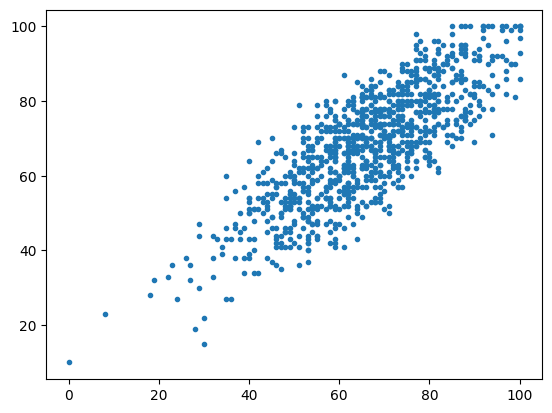

In [85]:
fig, ax = plt.subplots()
ax.plot(data['math_score'], data['writing_score'], '.')
# корреляция показала, что корреляция прямая

In [88]:
np.corrcoef(data['math_score'].values, data['writing_score'].values)[0,1]

0.8026420459498085

0.8026420459498085 - большая корреляция

#### А теперь проверьте их _статистически_

**Гипотеза 1.** Те, чьи родители имеют высшее образования, показывают более высокий бал
проверка на значимость отличий (на примере математики)

In [ ]:
# в самом ли деле различия, которые мы получили, сущществует,
# а не вызвано случайной причиной
# Чтобы ответить на этот вопрос, надо понять, как бывает, когда различий нет,
# а есть только случайные колебания

# Необходимо узнать, как распределялись бы случайные колебания при условии,
# что различий точно нет

# H0: различий нет
# H1: различия есть

In [54]:
math_perents0 = data_perents_nothigher['math_score'].values
math_perents1 = data_perents_higher['math_score'].values

mean_diff = math_perents1.mean() - math_perents0.mean()


In [55]:
# из семинара 1
def random_diff(array1: np.ndarray, array2: np.ndarray) -> float:
    together = np.concatenate((array1, array2))
    together_permutated = np.random.permutation(together)
    var1_new = together_permutated[:array1.size]
    var2_new = together_permutated[array1.size:]
    
    return var1_new.mean() - var2_new.mean()

In [56]:
N = 100000

mean_diffs = np.array([random_diff(math_perents1, math_perents0) for i in range(N)])

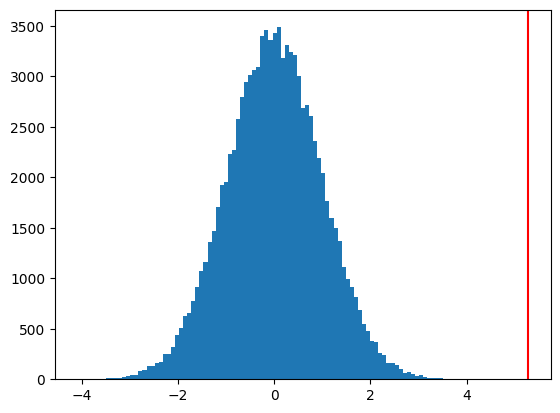

In [59]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.hist(mean_diffs, bins=100)
ax.axvline(mean_diff, color='red')

Есть различие и оно значимо!!!!

In [60]:
mean_diff

5.283733333333338

**Гепотиза 2** Заисит ли переменная 'lunch' от перменной 'gender'
значима ли разница?

In [ ]:
# H0 = исходим из того, что разницы нет
# ищем распределеие метрики при условии, что разницы на самом деле
# нет, а калебания случайны

In [67]:
crosstab = pd.crosstab(data['gender'], data['lunch'], normalize='index')
crosstab.round(2)

lunch,free/reduced,standard
gender,,
female,0.36,0.64
male,0.34,0.66


In [70]:
prop_diff = crosstab.loc['male', 'standard'] - crosstab.loc['female', 'standard']

In [74]:
def randome_diff_prop (arra1: pd.Series, array2: pd.Series) -> float:
    # перемешаем случайно array1 и array2 
    array2_permutated = np.random.permutation(array2)
    crosstab = pd.crosstab(arra1, array2_permutated, normalize='index')
    
    prop_diff = crosstab.loc['male', 'standard'] - crosstab.loc['female', 'standard']
    return prop_diff

In [75]:
N = 100000

mean_prop_diffs = np.array([randome_diff_prop(data['gender'], data['lunch'],) for i in range(N)])

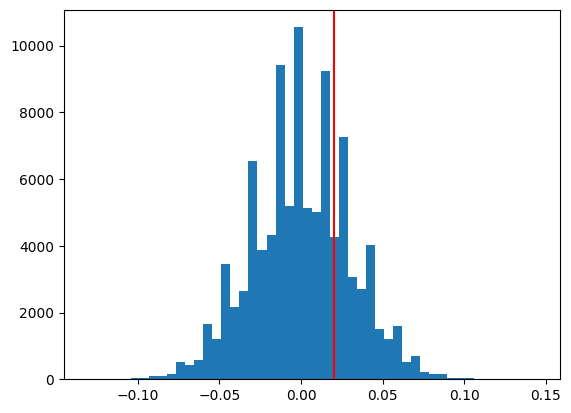

In [81]:
fig, ax = plt.subplots()

ax.hist(mean_prop_diffs, bins=50)
ax.axvline(prop_diff, color='red')

In [80]:
(mean_prop_diffs >= prop_diff).mean() # стандартное пороговое значание 0,05

0.27529

нет разницы между генторами в их пищевых предпочтениях

**Гипотеза 3** Знание по математике не связаны с навыками письма
проверка на значимость

In [90]:
real_cor = np.corrcoef(data['math_score'].values, data['writing_score'].values)[0,1]

In [92]:
random_cors = []
for i in range(10000):
    random_cors.append(np.corrcoef(data['math_score'].values, np.random.permutation(data['writing_score'].values))[0,1])

random_cors = np.array(random_cors)

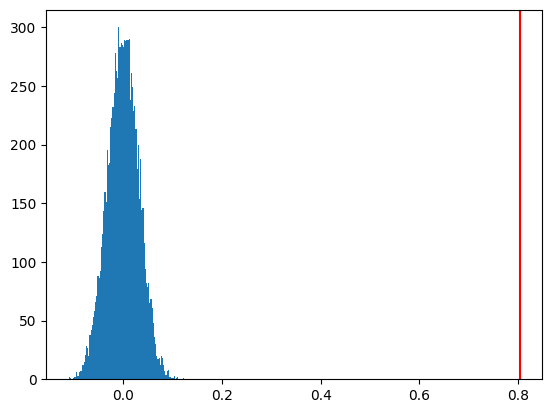

In [93]:
fig, ax = plt.subplots()

ax.hist(random_cors, bins=100)
ax.axvline(real_cor, color='red')